In [1]:
import rawpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import match_histograms

#raw_low_light = rawpy.imread("_MG_6393_LOW.CR2") # access to the RAW image
#raw_high_light = rawpy.imread("_MG_6392_HIGH.CR2") # access to the RAW image
#raw_high_low_light = rawpy.imread("IMG_1407_HIGH_LOW.CR2") # access to the RAW image

#rgb_low_light = raw_low_light.postprocess() # a numpy RGB array
#rgb_high_light = raw_high_light.postprocess() # a numpy RGB array
#rgb_high_low_ligh = raw_high_low_light.postprocess() # a numpy RGB array

#bgr_low_light = cv2.cvtColor(rgb_low_light, cv2.COLOR_RGB2BGR) # the OpenCV image RGB TO GRAY
#output_file = "_MG_6393_LOW1.jpg"
#cv2.imwrite(output_file, bgr_low_light)

#bgr_low_light = cv2.cvtColor(rgb_low_light, cv2.COLOR_RGB2BGR) # the OpenCV image RGB TO GRAY
#bgr_high_light = cv2.cvtColor(rgb_high_light, cv2.COLOR_RGB2BGR) # the OpenCV image RGB TO GRAY
#bgr_high_low_light = cv2.cvtColor(rgb_high_low_ligh, cv2.COLOR_RGB2BGR) # the OpenCV image RGB TO GRAY


In [2]:
def readImagefromFile(filename):
    img = cv2.imread(str(filename))
    print(f"Shape in put image is {img.shape}")
    img_out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"Shape out put image gray-scale is {img_out.shape}")
    return img_out
def ImageSubplot(img_in):
    fig, axs = plt.subplots(2, len(img_in), figsize=(30, 20))
    for i in range(len(img_in)):
        axs[0,i].imshow(img_in[i], cmap="gray")
        axs[0,i].set_xlabel("image " + str(i+1), fontsize=15)
        axs[1,i].hist(img_in[i].flatten(),bins=256)
        axs[1,i].set_xlabel('Hist image '+ str(i+1), fontsize=15)
    plt.show()

In [3]:
img1_gray =  readImagefromFile("ImageJPG/_MG_5613_HIGH.jpg")
img2_gray =  readImagefromFile("ImageJPG/_MG_6393_LOW.jpg")
img3_gray =  readImagefromFile("ImageJPG/IMG_1408_MID.jpg")

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)
Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)
Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


In [4]:
img = []
img.append(img1_gray)
img.append(img2_gray)
img.append(img3_gray)

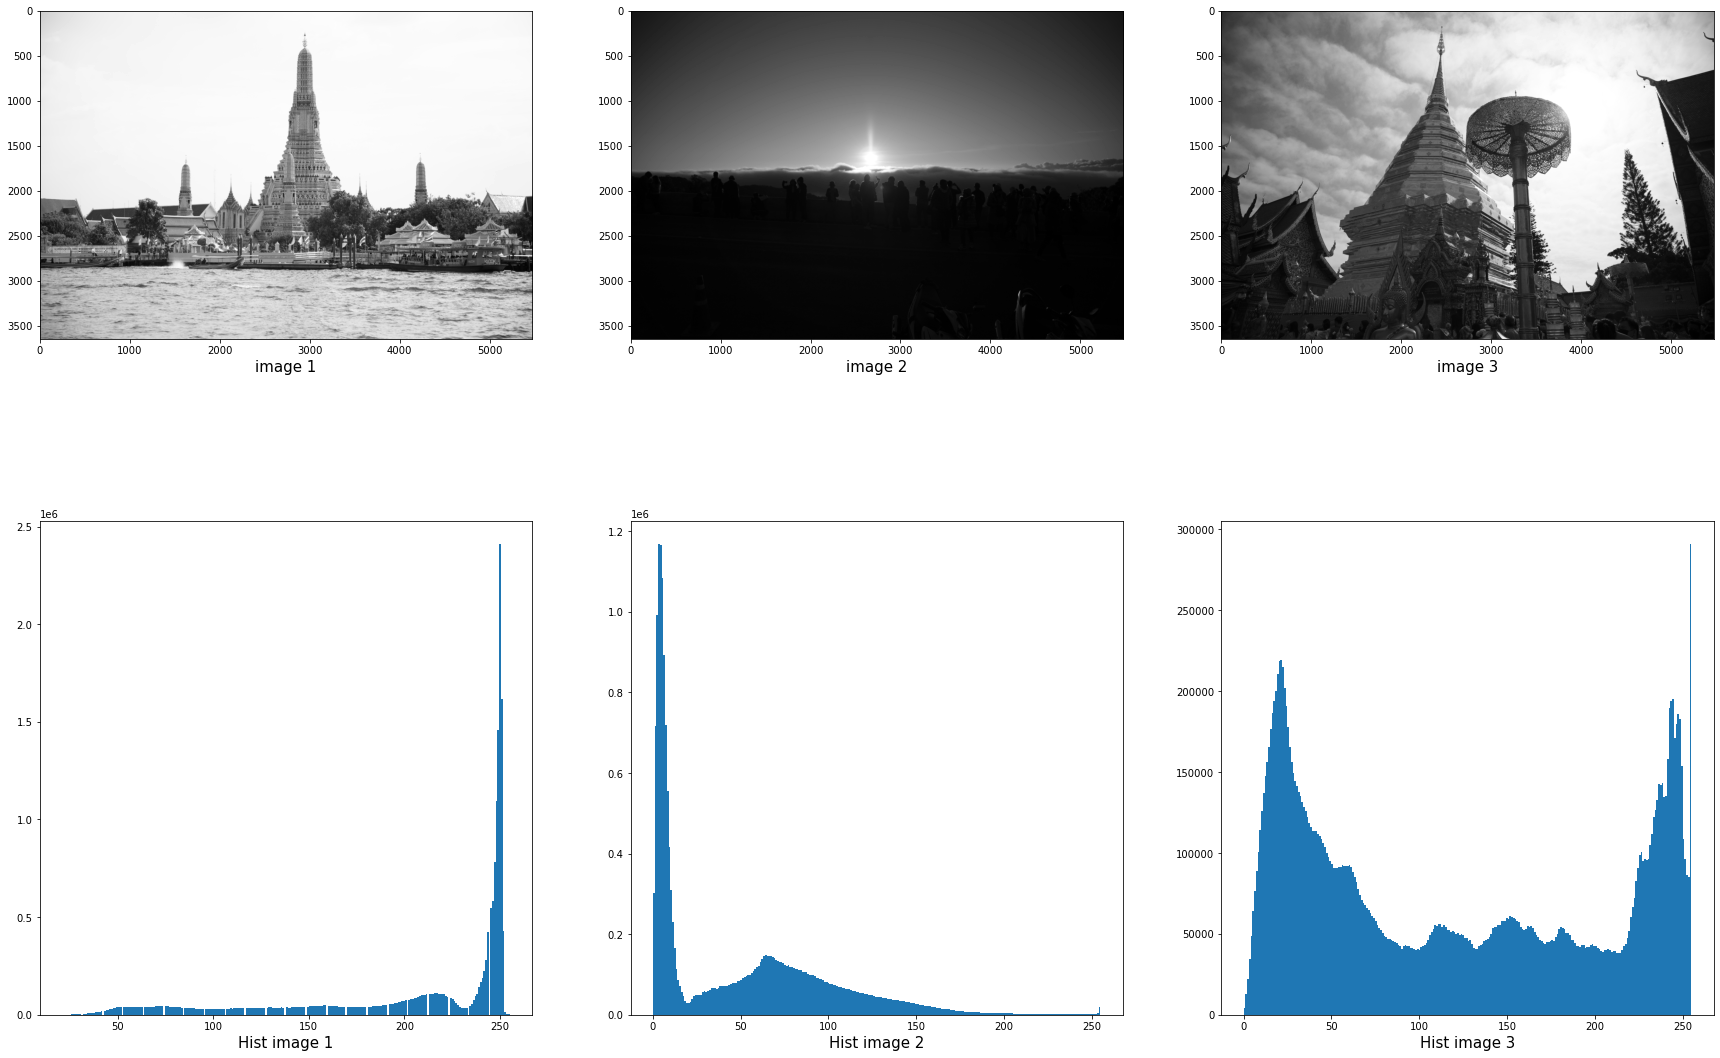

In [5]:
ImageSubplot(img)

# 1.4

# TEST 1 Power-law Transformation

In [6]:
## Normalize intensity
def Normalize_intensityRange01(img):
    img_gray_nor = []
    for i in range(len(img)):
        img_gray_nor_temp = (img[i]-img[i].min())/(img[i].max()-img[i].min())
        img_gray_nor.append(img_gray_nor_temp)
    return img_gray_nor

In [7]:
img_gray_nor = Normalize_intensityRange01(img)

In [8]:
gamma_img1_gray_nor = pow(img_gray_nor[0],2)
gamma_img2_gray_nor = pow(img_gray_nor[1],0.3)
gamma_img3_gray_nor = pow(img_gray_nor[2],0.5)

In [9]:
scaleback_gamma_img_gray_nor = []
scaleback_gamma_img1_gray_nor = gamma_img1_gray_nor*255
scaleback_gamma_img2_gray_nor = gamma_img2_gray_nor*255
scaleback_gamma_img3_gray_nor = gamma_img3_gray_nor*255

scaleback_gamma_img_gray_nor.append(scaleback_gamma_img1_gray_nor)
scaleback_gamma_img_gray_nor.append(scaleback_gamma_img2_gray_nor)
scaleback_gamma_img_gray_nor.append(scaleback_gamma_img3_gray_nor)

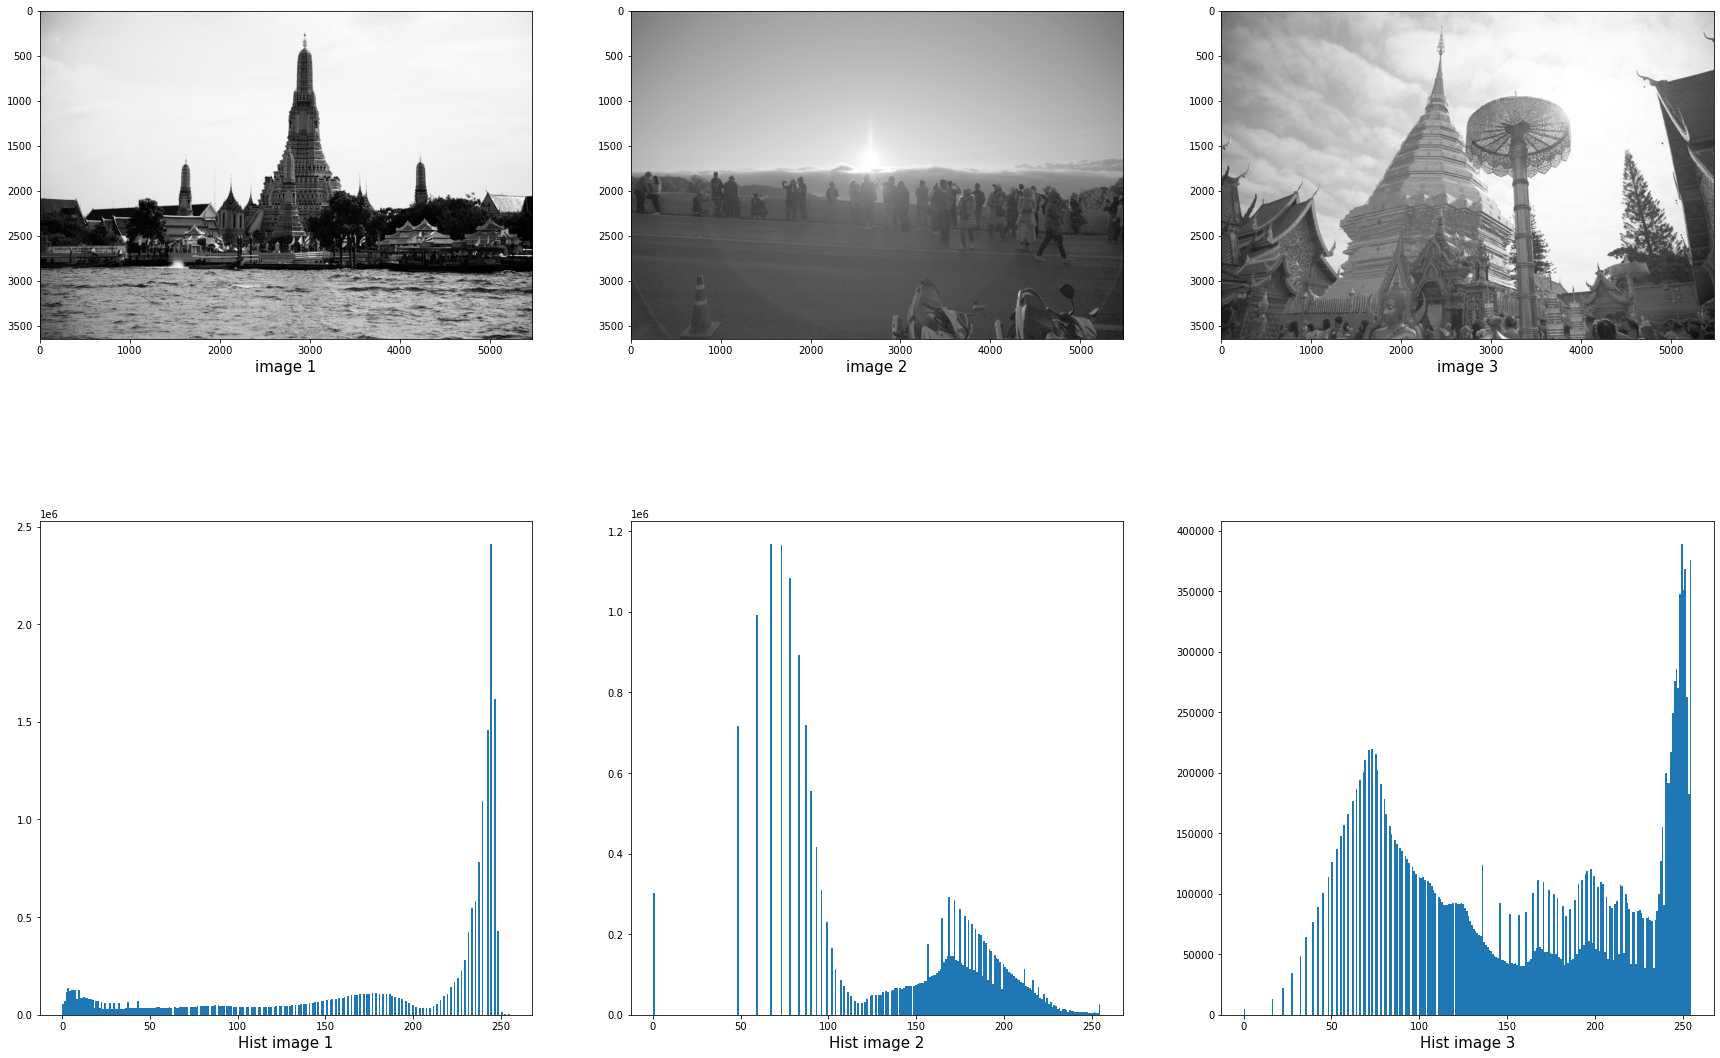

In [10]:
ImageSubplot(scaleback_gamma_img_gray_nor)

# Homework Report
### image 1 กราฟ Histogram ส่วนสว่างมีมากกว่าส่วนที่มืด ทำให้เลือกค่า gamma > 1 เพื่อดึงลายละเอียดในส่วนสว่างให้มืดลง เมื่อพิจารณากราฟ Histogram มีความกระจายมากขึ้น
###  image 2 กราฟ Histogram ส่วนมืดจะมีมากส่วนสว่างน้อย ทำให้เลื่อกค่า gamma < 1 เพื่อดึงลายละเอียดในส่วนที่มืดให้สว่างขึ้น เมื่อพิจารณากราฟ Histogram มีความกระจายมากขึ้น
###  image 3 กราฟ Histogram มีส่วนมืดและส่วนสว่างใกล้เคียงกัน และเมื่อพิจารณา image 1 และ image 2 จะเห็นว่าการดึงลายละเอียดในส่วนที่มืดจะยังเก็บลายละเอียดได้มากกว่าในส่วนที่สว่าง ทำให้เลื่อกค่า gamma < 1 เพื่อดึงลายละเอียดในส่วนที่มืดให้สว่างขึ้น

# 1.5

# TEST 2 Histogram equalization

In [11]:
def Hist_Equalization(img):
    out_hist_equa = []
    for i in range(len(img)): 
        hist_equa = cv2.equalizeHist(img[i])
        out_hist_equa.append(hist_equa)
    return out_hist_equa

In [12]:
img_hist_eq =  Hist_Equalization(img)

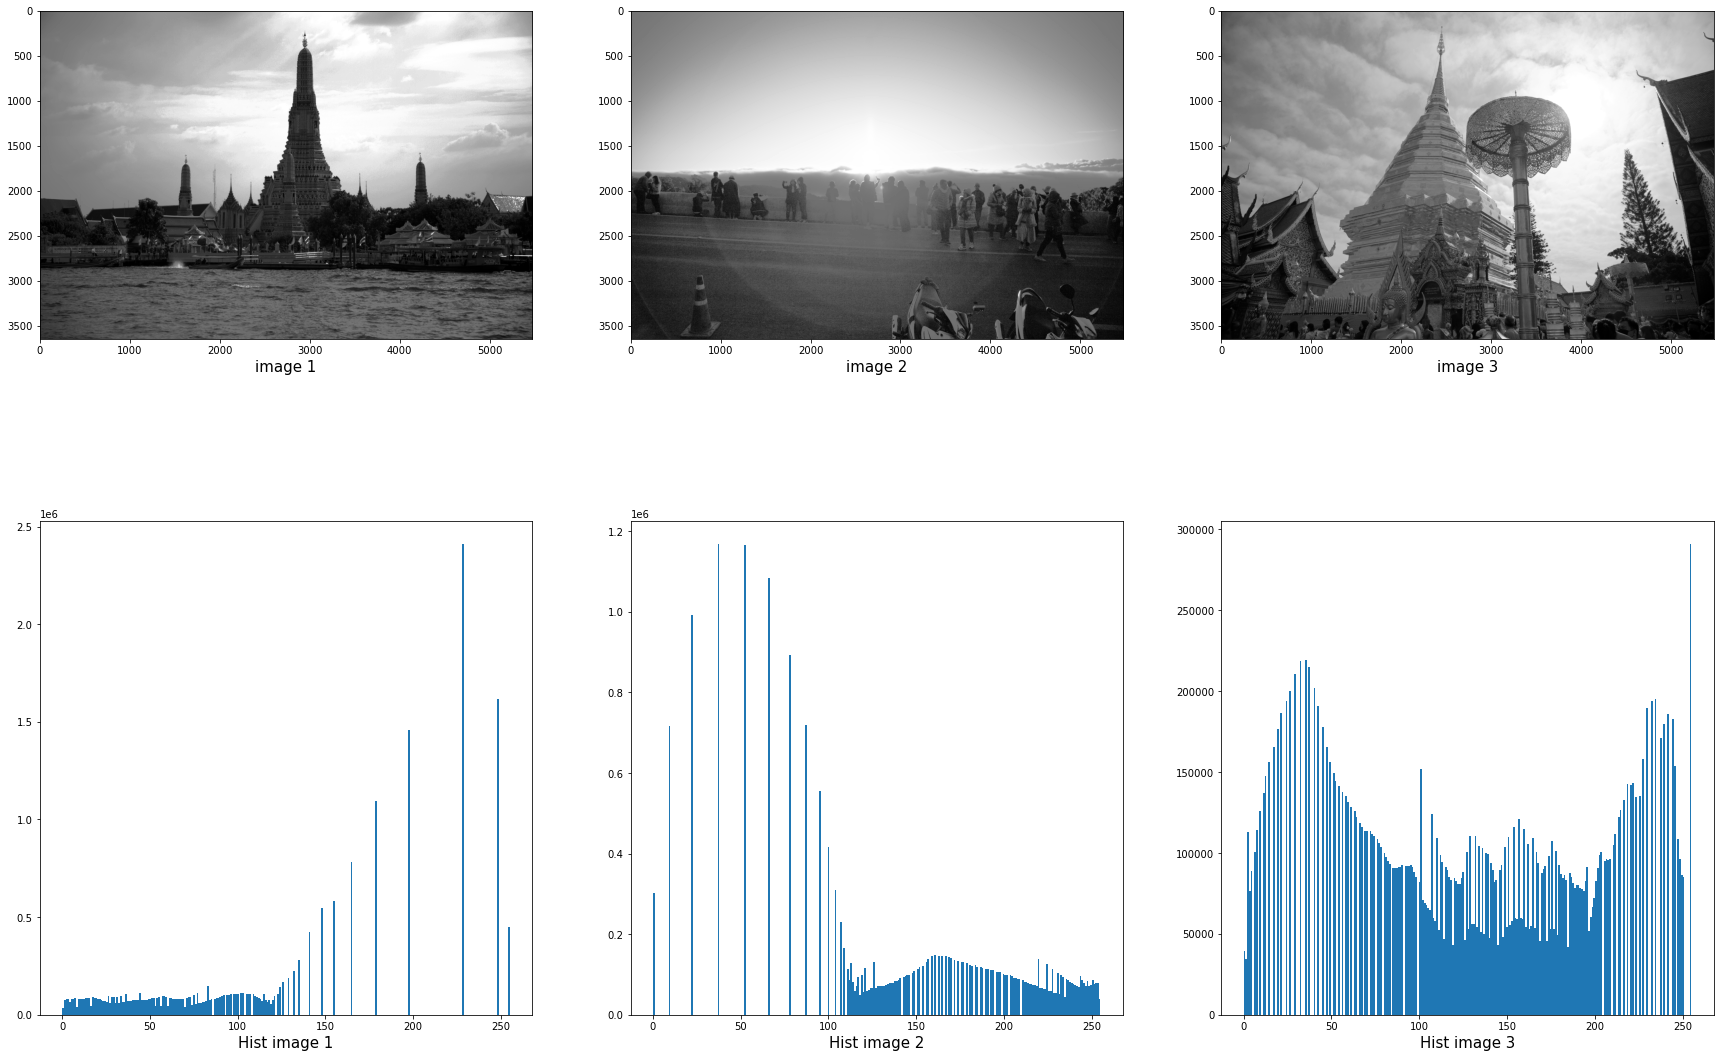

In [13]:
ImageSubplot(img_hist_eq)

# 1.6

# TEST 3 Histrogrm Specification

In [14]:
def  match_hist(img,img_ref):
    out_match_hist = []
    for i in range(len(img)): 
        match_hist = match_histograms(img[i],img_ref)
        out_match_hist.append(match_hist)
    return out_match_hist

In [15]:
img_ref =  readImagefromFile("ImageJPG_ref/IMG_0814.jpg")

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


In [16]:
match_histogram_img = match_hist(img,img_ref)
match_histogram_img.append(img_ref)

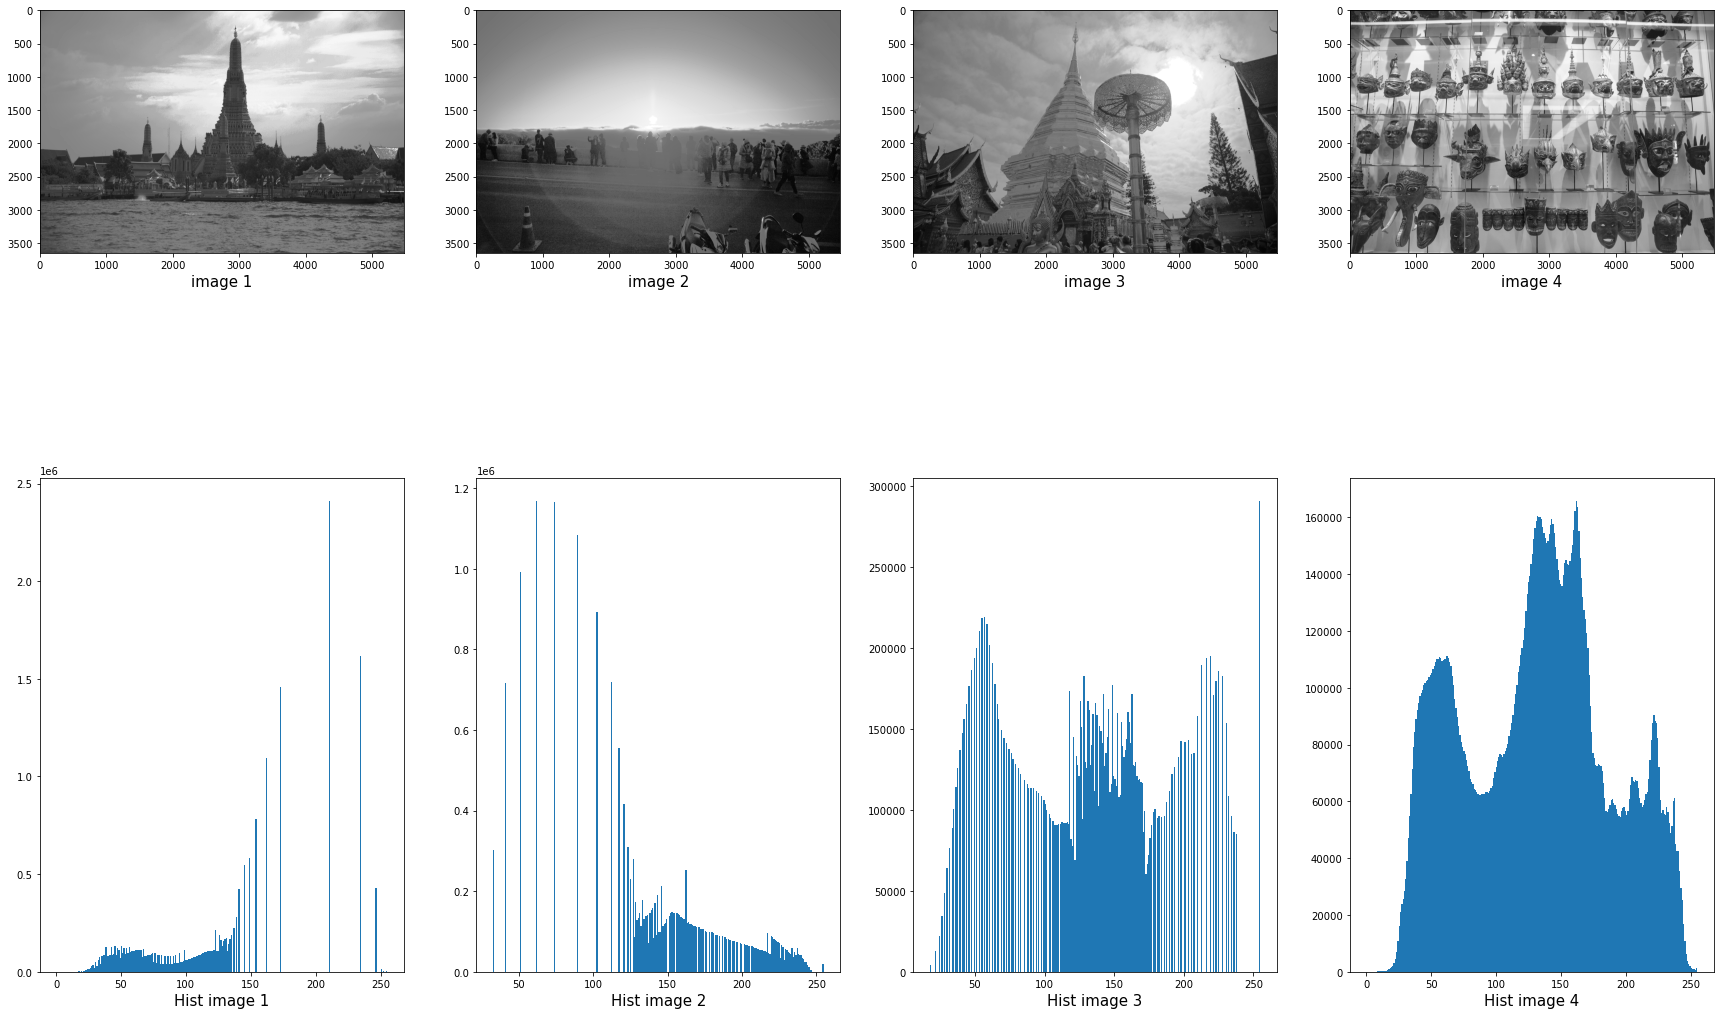

In [17]:
ImageSubplot(match_histogram_img)

# 1.7

# TEST 4 Contrast Limited Adaptive Histogram Equalization

In [18]:
def CLAHE(Clip_limit,Grid_shape,img_in):
    CLAHE_ = cv2.createCLAHE(clipLimit = Clip_limit,tileGridSize = Grid_shape)
    img_out = CLAHE_.apply(img_in)
    return img_out
def ComputePixel(Grid_shape,img_in):
    heigh_img = img1_gray.shape[0]/Grid_shape #ROW
    widlth_img = img1_gray.shape[1]//Grid_shape #COLUM
    print(f"MAX Clip limit is {heigh_img*widlth_img}")
    return heigh_img*widlth_img

In [19]:
MAX_Clip_limit1 = ComputePixel(4,img[0])
MAX_Clip_limit2 = ComputePixel(4,img[1])
MAX_Clip_limit3 = ComputePixel(4,img[2])

MAX Clip limit is 1247616.0
MAX Clip limit is 1247616.0
MAX Clip limit is 1247616.0


In [20]:
img1_CLAHE = CLAHE(MAX_Clip_limit1*0.25,(4,4),img[0])
img2_CLAHE = CLAHE(MAX_Clip_limit2*0.02,(4,4),img[1])
img3_CLAHE = CLAHE(MAX_Clip_limit3*0.20,(4,4),img[2])
img_CLAHE = []
img_CLAHE.append(img1_CLAHE)
img_CLAHE.append(img2_CLAHE)
img_CLAHE.append(img3_CLAHE)

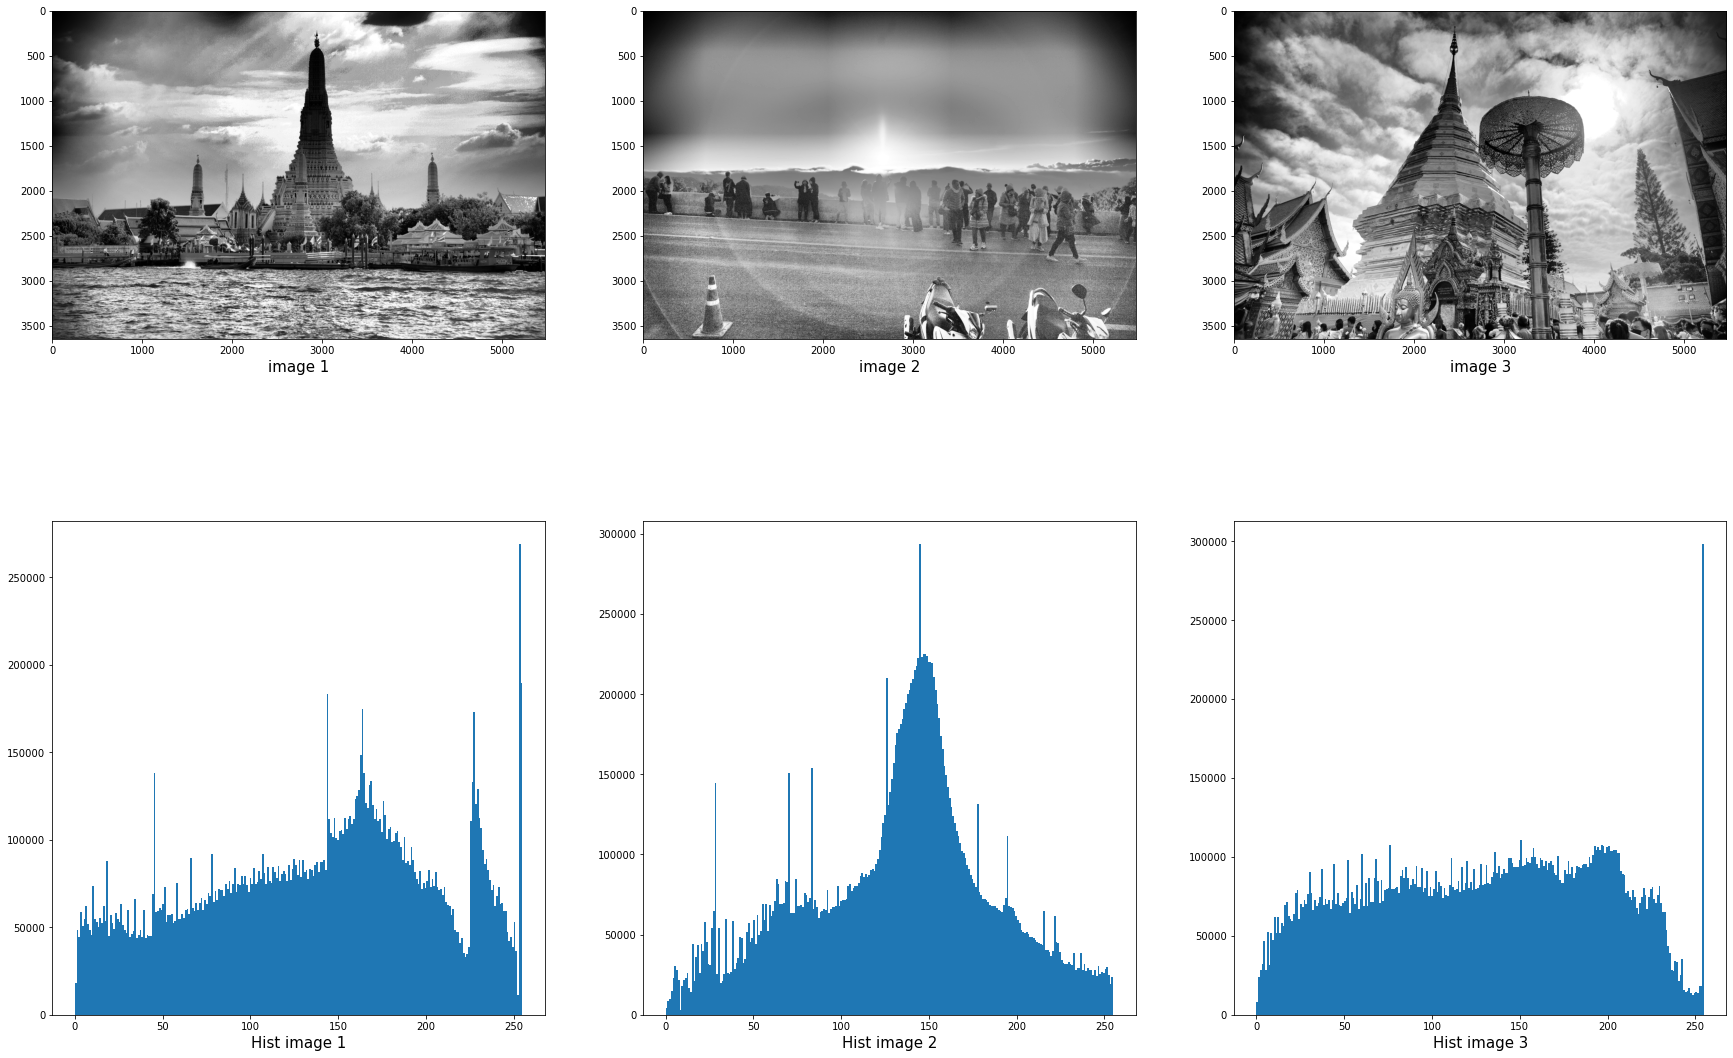

In [21]:
ImageSubplot(img_CLAHE)